In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed

seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor 

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
df=pd.read_excel('Pre-Processed-Data.xlsx')
df.head()

,Dew Point,Wind Speed,Pressure,Pressure Grad
0,4.8,2.47,1029.0,-8
1,8.2,7.42,1021.4,0
2,6.8,6.81,1021.8,11
3,3.6,3.94,1033.7,-1
4,6.1,3.33,1033.4,-11


In [3]:
df.isnull().sum()

Dew Point        0
Wind Speed       0
Pressure         0
Pressure Grad    0
dtype: int64

In [4]:
X = df.drop(['Wind Speed'], axis=1)
#Assign the Target column as the output 
Y= df['Wind Speed']

In [5]:
X_norm=(X-X.min())/(X.max()-X.min())
X_norm

,Dew Point,Pressure,Pressure Grad
0,0.487805,0.752055,0.449275
1,0.606272,0.647945,0.565217
2,0.557491,0.653425,0.724638
3,0.445993,0.816438,0.550725
4,0.533101,0.812329,0.405797
...,...,...,...
1091,0.411150,0.706849,0.623188
1092,0.470383,0.767123,0.594203
1093,0.595819,0.795890,0.594203
1094,0.564460,0.831507,0.565217


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=0)

In [9]:
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation="sigmoid", kernel_initializer='normal'))
model.add(Dropout(0.2)) #dropping a few neurons for generalizing the model
model.add(Dense(8, input_dim=x_train.shape[1], activation="sigmoid", kernel_initializer='normal'))
model.add(Dropout(0.2)) 
model.add(Dense(1, activation="linear", kernel_initializer='normal'))
adam = Adam(learning_rate=1e-3, decay=1e-3)

# Compile model
model.compile(loss="mean_squared_error", optimizer='adam', metrics=['mse','mae'])

In [10]:
print('Fit model...')
filepath="/home/m-marouni/Documents/CE-901/Heathrow/best_weights"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_mae', patience=100, verbose=1, mode='min')
callbacks_list = [checkpoint, early_stopping]

log = model.fit(x_train, y_train,
          validation_split=0.40, batch_size=30, epochs=1000, shuffle=True, callbacks=callbacks_list)

Fit model...
Epoch 1/1000
18/18 [==============================] - 14s 41ms/step - loss: 43.0123 - mse: 43.0123 - mae: 6.0172 - val_loss: 37.8421 - val_mse: 37.8421 - val_mae: 5.6710

Epoch 00001: val_mae improved from inf to 5.67100, saving model to /home/m-marouni/Documents/CE-901/Heathrow/best_weights
INFO:tensorflow:Assets written to: /home/m-marouni/Documents/CE-901/Heathrow/best_weights/assets
Epoch 2/1000
18/18 [==============================] - 0s 6ms/step - loss: 41.1612 - mse: 41.1612 - mae: 5.8579 - val_loss: 36.7385 - val_mse: 36.7385 - val_mae: 5.5728

Epoch 00002: val_mae improved from 5.67100 to 5.57284, saving model to /home/m-marouni/Documents/CE-901/Heathrow/best_weights
INFO:tensorflow:Assets written to: /home/m-marouni/Documents/CE-901/Heathrow/best_weights/assets
Epoch 3/1000
18/18 [==============================] - 0s 5ms/step - loss: 40.9411 - mse: 40.9411 - mae: 5.8097 - val_loss: 35.6141 - val_mse: 35.6141 - val_mae: 5.4710

Epoch 00003: val_mae improved from 5

In [9]:
def show_info(model, X, y, log, weights = None):
    '''
    Show metrics about the evaluation model and plots about loss, rmse and rmspe
    '''
    if (log != None):
        # summarize history for loss
        plt.figure(figsize=(14,10))
        plt.plot(log.history['loss'])
        plt.plot(log.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('\n')

        # summarize history for MAE
        plt.figure(figsize=(14,10))
        plt.plot(log.history['mae'])
        plt.plot(log.history['val_mae'])
        plt.title('Model MAE')
        plt.ylabel('MAE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('\n')

        # summarize history for MSE
        plt.figure(figsize=(14,10))
        plt.plot(log.history['mse'])
        plt.plot(log.history['val_mse'])
        plt.title('Model MSE')
        plt.ylabel('MSE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('\n')
    if (weights != None):
        model.load_weights(weights)

    predictions = model.predict(X, verbose=1)

    mse = mean_squared_error(y, predictions)
    mae= mean_absolute_error(y, predictions)

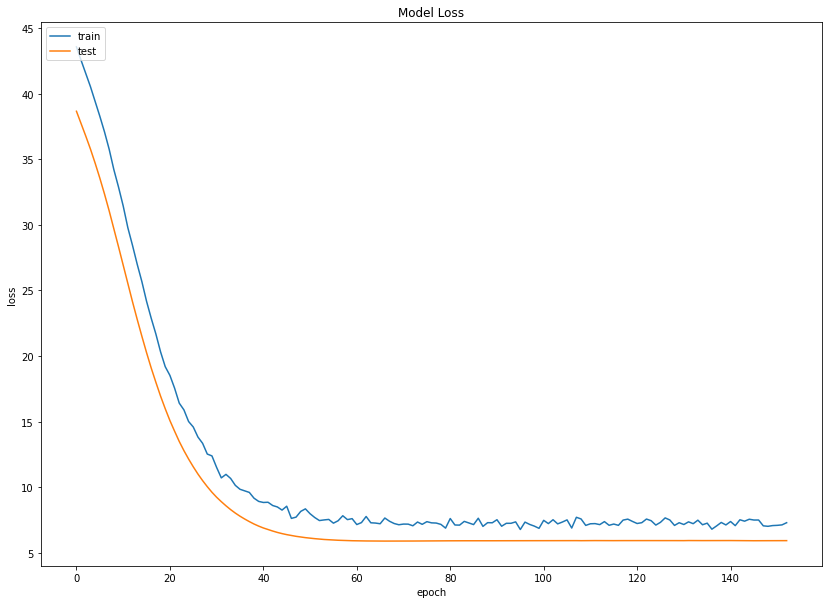

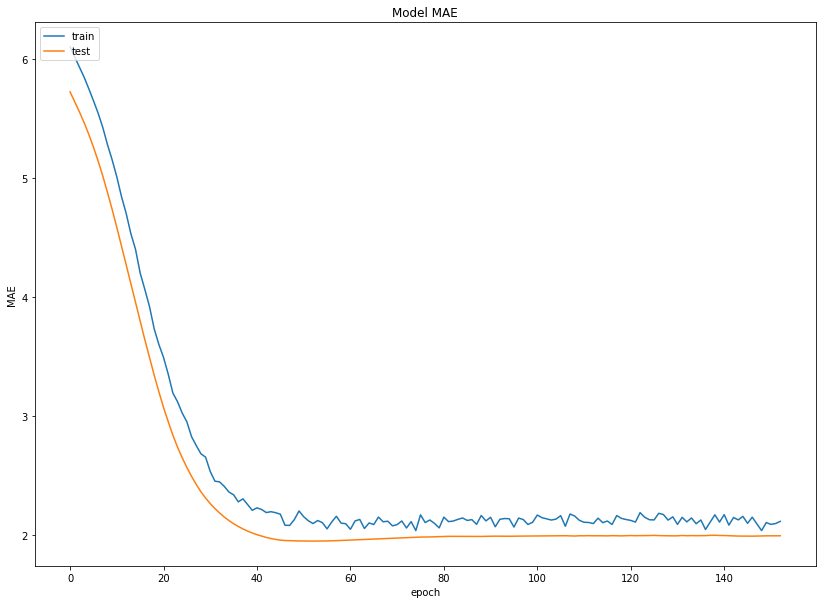

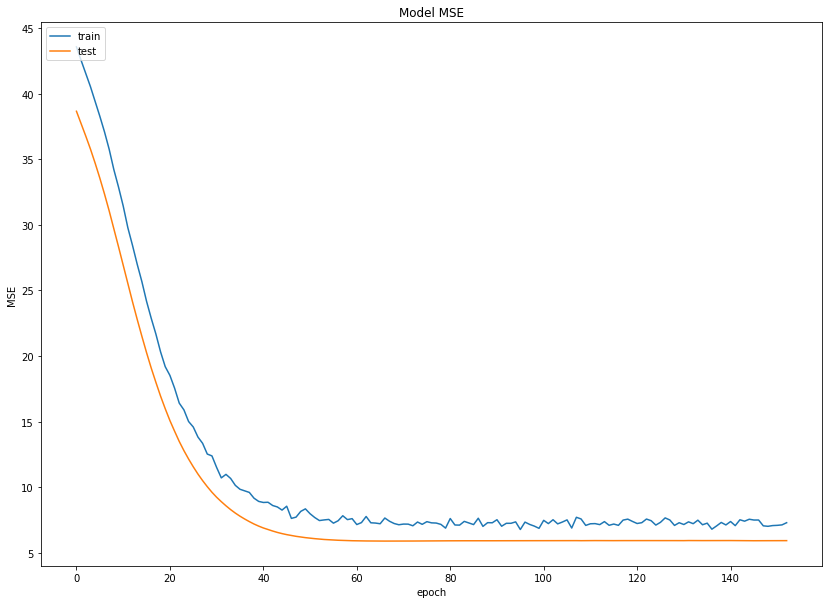



11/11 [==============================] - 0s 827us/step


In [10]:
show_info(model, x_test, y_test, log, weights='/home/m-marouni/Documents/CE-901/Heathrow/best_weights')